## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


## Imports and dataset cleaning

In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, ttest_1samp, t, chi2_contingency

In [0]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime',
                  'duty-free', 'south-africa']
                          
votes_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=column_headers, na_values='?')

votes_df = votes_df.replace({'n': 0, 'y': 1})

In [13]:
votes_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


##1. Generate and numerically represent a confidence interval

In [22]:
data = votes_df['water-project']

moe = np.std(data, ddof=1)/np.sqrt(len(data)) * t.ppf((1 + 0.95) / 2, len(data) - 1)

print(f'Lower bound: {(np.mean(data) - moe) * 100:,.2f}%')
print(f'Upper bound: {(np.mean(data) + moe) * 100:,.2f}%')
print(f'Sample mean: {np.mean(data) * 100:,.2f}%')

Lower bound: 45.67%
Upper bound: 55.11%
Sample mean: 50.39%


##2. Graphically (with a plot) represent the confidence interval

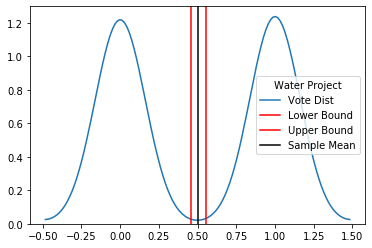

In [30]:
sns.kdeplot(data.dropna())
plt.axvline(x=np.mean(data) - moe, color='red')
plt.axvline(x=np.mean(data) + moe, color='red')
plt.axvline(x=np.mean(data), color='k')
plt.legend(title='Water Project', loc='right', labels=['Vote Dist', 'Lower Bound',
                                            'Upper Bound', 'Sample Mean']
           );

##3. Interpret the confidence interval - what does it tell you about the data and its distribution?

The confidence interval tells you how closely the sample mean ties to the population mean.  If the sample is representative of the population, then repeated samples should contain the population mean within the confidence interval 95% of the time.

In the case of the water project bill, it would be reasonable to say that the population of US voters is likely very similarly split on support for this bill (if we maintain the assumptions from above).

##4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data


In [0]:
chi_df = votes_df[['education', 'budget']].dropna()

In [48]:
chi_df

,education,budget
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
5,0.0,1.0
...,...,...
430,1.0,1.0
431,0.0,1.0
432,1.0,0.0
433,1.0,0.0


In [52]:
contingency_table = pd.crosstab(chi_df['education'], chi_df['budget'], margins=True)
contingency_table

budget,0.0,1.0,All
education,,,
0.0,28,201,229
1.0,133,35,168
All,161,236,397


In [55]:
row_sums = contingency_table.iloc[0:2, 2].values
col_sums = contingency_table.iloc[2, 0:2].values
total = contingency_table.loc['All','All']

print(row_sums)
print(col_sums)
print(total)

[229 168]
[161 236]
397


In [51]:
votes = pd.crosstab(chi_df['education'], chi_df['budget']).values
print(votes.shape)
votes

(2, 2)


array([[ 28, 201],
       [133,  35]])

In [56]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 2)
[[ 92.86901763 136.13098237]
 [ 68.13098237  99.86901763]]


In [57]:
observed = pd.crosstab(chi_df['education'], chi_df['budget']).values
print(observed.shape)
observed

(2, 2)


array([[ 28, 201],
       [133,  35]])

  ### - By hand using Numpy

In [64]:
chi_squared = (((observed - expected) ** 2 ) / expected).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 180.1206557472226


In [59]:
dof = (len(row_sums) - 1) * (len(col_sums) - 1)
print(f"Degrees of Freedom: {dof}")

Degrees of Freedom: 1


  ### - In a single line using Scipy

In [62]:
chi_squared, p_value, dof, expected = chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 177.35467451749057
P-value: 1.8324214215333413e-40
Degrees of Freedom: 1
Expected: 
 [[ 92.86901763 136.13098237]
 [ 68.13098237  99.86901763]]


Due to a p-value of very near zero (1.8e-40), we reject the null hypothesis that support for the two bills is independent and conclude that there is an association between support for the education bill and support for the budget bill.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)